<a href="https://colab.research.google.com/github/Mvaleta54/Mvaleta54/blob/main/User_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# User Segmentation

## ___ Steps ___
### 1. Read and explore the dataset the classic way
### 2. Clean and prepare the data set
### 3. Calculate recency      
### 4. Calculate frequency
### 5. Calculate Monetary Value
### 6. Create RFM Table
### 7. Customer segments with RFM Model

# Start!

In [3]:
# configure your enviroment to the directory where you have the data set file

import sys
import os
sys.path.append('/Volumes/GoogleDrive/Mi unidad/bdata/DAM21 - User Segmentation')

In [85]:
# data analysis and wrangling
import pandas as pd
import numpy as np

import datetime as dt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
sns.set(color_codes=True)
%matplotlib inline

# data profiling
from pandas_profiling import ProfileReport

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Read and explore the dataset (the classic way)

Download the data [there](https://drive.google.com/file/d/1LDddA1CusmU5gi3lOCJbJSt-aLZ29412/view?usp=sharing)

In [4]:
#Upload the data

from google.colab import files

uploaded = files.upload()

Saving orders_3months.csv to orders_3months.csv


In [5]:
# Read the dataset and save it on a data frame called "orders_df" using read_csv() pandas method

orders_df = pd.read_csv("orders_3months.csv")

In [6]:
# check the orders_df using head()

orders_df.head()

,customer_id,order_id,order_creation_time,business_vertical,final_status,category,purchases_total_price
0,38741068.0,186245187,2020-12-14 21:37:33.000000,WALL - Partner,DeliveredStatus,RESTAURANT,26.3
1,38741068.0,181994391,2020-12-03 21:29:11.000000,WALL - Partner,DeliveredStatus,RESTAURANT,13.0
2,38741068.0,143275897,2020-08-01 21:26:47.000000,WALL - Partner,DeliveredStatus,RESTAURANT,19.3
3,643636.0,165149054,2020-10-15 15:19:48.000000,WALL - Partner,DeliveredStatus,MCDONALDSES,10.1
4,643636.0,186743280,2020-12-16 15:09:31.000000,WALL - Partner,DeliveredStatus,RESTAURANT,20.0


In [7]:
# check the info of the dataframe

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            99956 non-null   float64
 1   order_id               100000 non-null  int64  
 2   order_creation_time    100000 non-null  object 
 3   business_vertical      100000 non-null  object 
 4   final_status           100000 non-null  object 
 5   category               100000 non-null  object 
 6   purchases_total_price  100000 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ MB


In [8]:
# check the general statistics of the datafram

orders_df.describe()

,customer_id,order_id,purchases_total_price
count,9.995600e+04,1.000000e+05,100000.000000
mean,1.384674e+07,1.644494e+08,20.485853
std,1.564028e+07,1.636581e+07,15.377681
min,4.750000e+02,1.344651e+08,0.000000
25%,9.036830e+05,1.506488e+08,11.600000
50%,6.000776e+06,1.656702e+08,17.000000
75%,2.469939e+07,1.782015e+08,25.850000
max,5.072606e+07,1.918129e+08,859.000000


## 2. Clean and prepare the data set

In [44]:
# 1. Drop NA records in customer_id (inplace)

orders_df.dropna(subset=['customer_id'], inplace=True)

In [45]:
# 2. Drop the orders that have been cancelled 

orders_df.drop(orders_df[orders_df['final_status'] == "CanceledStatus"].index, inplace = True)

In [46]:
# 3. Transform customer_id to integer

orders_df['customer_id'] = orders_df['customer_id'].astype(int)

In [47]:
# 4. Replace 0 values in purchases_total_price with the mean of the column

orders_df['purchases_total_price'].replace(0,orders_df['purchases_total_price'].mean(axis=0), inplace=True)

# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups of interest for the business.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases 
- MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

## 3. Calculate Recency

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [48]:
# 1. Print the last date available in our dataset: We'll use it as a reference to evaluate 
# how many days ago was the customer's last purchase.

orders_df['order_creation_time'].max()

'2020-12-30 23:30:38.000000'

In [49]:
# 2. Save the max date as "now" to reuse as a reference later

now = dt.date(2020,12,30)
print(now)

2020-12-30


In [50]:
# 3. Create a new column called "date" which contains only the date of the order without it's time.

orders_df['date'] = pd.DatetimeIndex(orders_df['order_creation_time']).date
orders_df.head()

,customer_id,order_id,order_creation_time,business_vertical,final_status,category,purchases_total_price,date
0,38741068,186245187,2020-12-14 21:37:33.000000,WALL - Partner,DeliveredStatus,RESTAURANT,26.3,2020-12-14
1,38741068,181994391,2020-12-03 21:29:11.000000,WALL - Partner,DeliveredStatus,RESTAURANT,13.0,2020-12-03
2,38741068,143275897,2020-08-01 21:26:47.000000,WALL - Partner,DeliveredStatus,RESTAURANT,19.3,2020-08-01
3,643636,165149054,2020-10-15 15:19:48.000000,WALL - Partner,DeliveredStatus,MCDONALDSES,10.1,2020-10-15
4,643636,186743280,2020-12-16 15:09:31.000000,WALL - Partner,DeliveredStatus,RESTAURANT,20.0,2020-12-16


In [51]:
# 4. Group by customers and check last date of purchase (last_purchase_date for every customer)
# 4.1 Save it to "recency_df"
# 4.2 Name the colums of recency_df as "customer_id" and "last_purchase_date"

recency_df = orders_df.groupby(by='customer_id', as_index=False)['date'].max()
recency_df.columns = ['customer_id','last_purchase_date']
recency_df.head()

,customer_id,last_purchase_date
0,475,2020-10-15
1,515,2020-11-11
2,617,2020-12-30
3,621,2020-11-30
4,639,2020-10-25


In [52]:
recency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11679 entries, 0 to 11678
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         11679 non-null  int64 
 1   last_purchase_date  11679 non-null  object
dtypes: int64(1), object(1)
memory usage: 182.6+ KB


In [53]:
# 5. Calculate recency for every customer (days since last purchase) using the date we saved previously

recency_df['recency'] = recency_df['last_purchase_date'].apply(lambda x: (now - x).days)
recency_df.head()

,customer_id,last_purchase_date,recency
0,475,2020-10-15,76
1,515,2020-11-11,49
2,617,2020-12-30,0
3,621,2020-11-30,30
4,639,2020-10-25,66


In [54]:
recency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11679 entries, 0 to 11678
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         11679 non-null  int64 
 1   last_purchase_date  11679 non-null  object
 2   recency             11679 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 273.9+ KB


In [55]:
# 6. Drop last_purchase_date as we don't need it anymore

recency_df.drop('last_purchase_date', axis=1, inplace=True)

## 4. Calculate Frequency

 Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many orders each user has placed. 

In [56]:
# 1. Group by customers and count the amount of orders per customer
# 1.1 Save it to "frequency_df"
# 1.2 Name the colums of recency_df as "customer_id" and "frequency"

frequency_df = orders_df.groupby(by=['customer_id'], as_index=False)['order_id'].count()
frequency_df.columns = ['customer_id','frequency']
frequency_df.head()

,customer_id,frequency
0,475,2
1,515,2
2,617,48
3,621,3
4,639,4


## 5. Calculate Monetary Value

Monetary attribute answers the question: How much money did the customer spent over time? To do that, we will create an aggregate of all customers and sum all their orders

In [57]:
# 1. Group by customer column total_spend
# 1.1 Save it to "monetary_df"
# 1.2 Name the colums of recency_df as "customer_id" and "monetary"

monetary_df = orders_df.groupby(by='customer_id',as_index=False).agg({'purchases_total_price': 'sum'})
monetary_df.columns = ['customer_id','monetary']
monetary_df.head()

,customer_id,monetary
0,475,51.500000
1,515,44.660000
2,617,1046.212972
3,621,135.400000
4,639,67.784324


## 6. Create RFM Table

In [58]:
# 1. Merge recency dataframe with frequency dataframe using customer_id as the key

temp_df = recency_df.merge(frequency_df, on='customer_id')
temp_df.head()

,customer_id,recency,frequency
0,475,76,2
1,515,49,2
2,617,0,48
3,621,30,3
4,639,66,4


In [59]:
# 2. Merge with monetary dataframe to get a table with the 3 columns

rfm_df = temp_df.merge(monetary_df, on='customer_id')

# Use CustomerID as index

rfm_df.set_index('customer_id', inplace=True)
rfm_df.head()

,recency,frequency,monetary
customer_id,,,
475,76,2,51.500000
515,49,2,44.660000
617,0,48,1046.212972
621,30,3,135.400000
639,66,4,67.784324


In [60]:
rfm_df.describe()

,recency,frequency,monetary
count,11679.000000,11679.000000,11679.000000
mean,46.505266,8.257642,177.811158
std,48.766883,15.127572,360.249462
min,0.000000,1.000000,0.010000
25%,9.000000,1.000000,28.650000
50%,27.000000,3.000000,71.050000
75%,71.000000,9.000000,185.700000
max,182.000000,330.000000,12085.318648


In [61]:
# 3. RFM Table Correctness verification

orders_df[orders_df['customer_id']==639]

,customer_id,order_id,order_creation_time,business_vertical,final_status,category,purchases_total_price,date
38202,639,168645466,2020-10-25 20:29:20.000000,WALL - Partner,DeliveredStatus,RESTAURANT,12.250000,2020-10-25
38204,639,165562192,2020-10-16 19:53:12.000000,COURIER,DeliveredStatus,COURIER,21.154324,2020-10-16
38205,639,156062048,2020-09-16 16:45:35.000000,WALL - Partner,DeliveredStatus,REGALO,23.800000,2020-09-16
38206,639,166093769,2020-10-18 02:22:50.000000,WALL - Partner,DeliveredStatus,SuperGlovo,10.580000,2020-10-18


## 7. Customer segments with RFM Model 

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [74]:
# 1. RFM Quartiles: use quantile() method and print the Quartiles

quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0.25,2.0,1.0,18.4000,1.0,1.0,1.0,111.0
0.50,9.0,10.0,207.6100,4.0,4.0,4.0,422.0
0.75,112.0,21.0,451.2975,4.0,4.0,4.0,444.0


In [75]:
# 2. Save the a quartiles in a dictionary using quantiles.to_dict()

quantiles.to_dict()

{'recency': {0.25: 2.0, 0.5: 9.0, 0.75: 112.0},
 'frequency': {0.25: 1.0, 0.5: 10.0, 0.75: 21.0},
 'monetary': {0.25: 18.4, 0.5: 207.60999999999999, 0.75: 451.2975},
 'R_Quartile': {0.25: 1.0, 0.5: 4.0, 0.75: 4.0},
 'F_Quartile': {0.25: 1.0, 0.5: 4.0, 0.75: 4.0},
 'M_Quartile': {0.25: 1.0, 0.5: 4.0, 0.75: 4.0},
 'RFMScore': {0.25: 111.0, 0.5: 422.0, 0.75: 444.0}}

## 8. Creation of RFM Segments

We need two segmentation classes since high recency is bad, while high frequency and monetary value is good.

In [64]:
# 1. Create a RScore() and FMScore() functions that receive 
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# and apply the quartile calculation

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [65]:
# 2. Create rfm segmentation table

rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [66]:
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
475,76,2,51.500000,1,2,2
515,49,2,44.660000,2,2,2
617,0,48,1046.212972,4,4,4
621,30,3,135.400000,2,2,3
639,66,4,67.784324,2,3,2


Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [67]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)

rfm_segmentation['RFMScore'] = rfm_segmentation['RFMScore'].astype(int)
rfm_segmentation.head()

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,,,,,,,
475,76,2,51.500000,1,2,2,122
515,49,2,44.660000,2,2,2,222
617,0,48,1046.212972,4,4,4,444
621,30,3,135.400000,2,2,3,223
639,66,4,67.784324,2,3,2,232


### Best Recency score = 4 most recently purchase. 
### Best Frequency score = 4: most quantity purchase. 
### Best Monetary score = 4: spent the most.

Let's see who are our Power Users (best customers).

In [68]:
rfm_segmentation[rfm_segmentation['RFMScore']==444].sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,,,,,,,
176849,1,330,12085.318648,4,4,4,444
903683,2,226,10652.087279,4,4,4,444
10241253,0,166,8550.868648,4,4,4,444
1285701,0,202,7927.990000,4,4,4,444
587632,0,106,4659.430000,4,4,4,444
3282688,6,122,4654.630000,4,4,4,444
1275832,0,123,4525.270000,4,4,4,444
16277134,0,233,4211.008648,4,4,4,444
7593634,3,70,4069.880000,4,4,4,444


How many customers do we have in each segment?

In [69]:
print("Champion Customers: ", len(rfm_segmentation[rfm_segmentation['RFMScore']==444]))

print('Loyal Customers: ', len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))

print("Big Spenders: ", len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))

print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']==244]))

print('Lost Good Customers: ', len(rfm_segmentation[rfm_segmentation['RFMScore']==144]))

print('Lost Cheap Customers: ', len(rfm_segmentation[rfm_segmentation['RFMScore']==111]))

Champion Customers:  1438
Loyal Customers:  2693
Big Spenders:  2919
Almost Lost:  205
Lost Good Customers:  82
Lost Cheap Customers:  1329


Let's store our segments

In [95]:
# create a list of our conditions
conditions = [
    (rfm_segmentation['RFMScore']==444),
    (rfm_segmentation['RFMScore']==422),
    (rfm_segmentation['RFMScore']==422),
    (rfm_segmentation['RFMScore']==244),
    (rfm_segmentation['RFMScore']==144),
    (rfm_segmentation['RFMScore']==111),
    ]

# create a list of the values we want to assign for each condition
values = ['Champion', 
          'Loyal', 
          'BigSpender', 
          'AlmostLost', 
          'LostGood', 
          'LostCheap']

# create a new column and use np.select to assign values to it using our lists as arguments
rfm_segmentation['CustomerRFMSegment'] = np.select(conditions, values, default="NoSegment")

# display updated DataFrame
rfm_segmentation.head(20)

,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,CustomerRFMSegment
customer_id,,,,,,,,
617,0,48,1046.212972,4,4,4,444,Champion
1340,4,28,713.640000,4,4,4,444,Champion
2856,3,49,730.260000,4,4,4,444,Champion
3276,1,62,1707.160000,4,4,4,444,Champion
3367,4,20,743.571619,4,4,4,444,Champion
3607,9,3,38.600000,4,2,2,422,Loyal
4114,7,17,215.750000,4,4,4,444,Champion
4346,7,87,1246.113239,4,4,4,444,Champion
4444,0,32,902.554324,4,4,4,444,Champion


In [87]:
# let's remove the non segmented customers

rfm_segmentation.drop(rfm_segmentation[rfm_segmentation['CustomerRFMSegment'] == "NoSegment"].index, inplace = True)

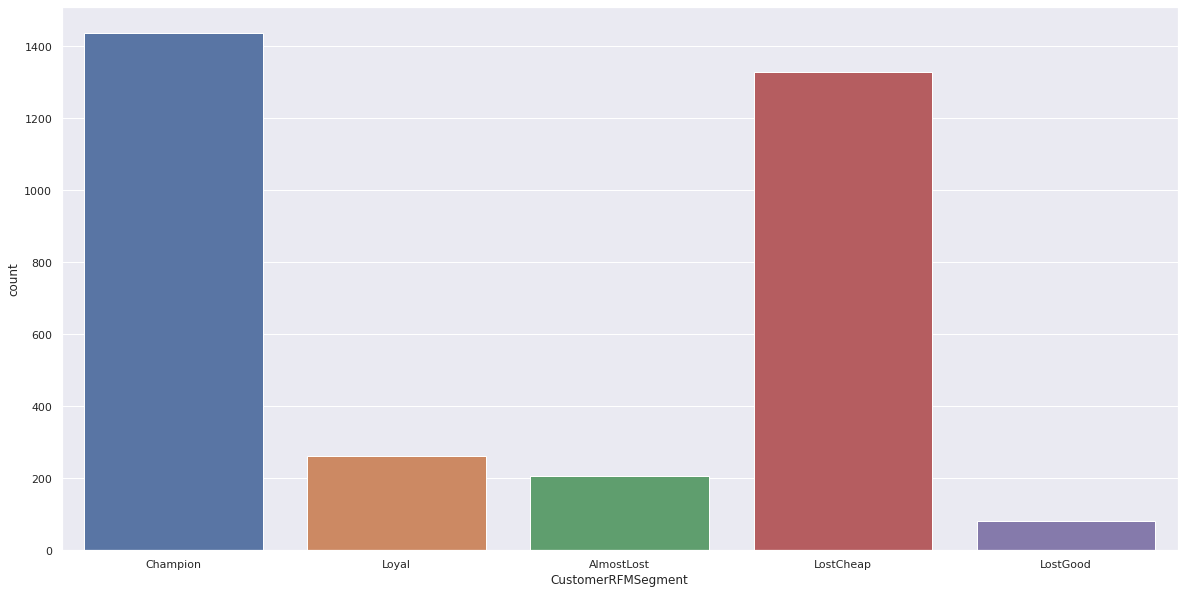

In [94]:
# setting the size of the plot
plt.figure(figsize=(20,10))

ax = sns.countplot(x="CustomerRFMSegment", data=rfm_segmentation)

Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

At Risk: Send them personalized emails to encourage them to place an order.

# Done!